In [1]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=30)

In [2]:
import matplotlib.pyplot as plt

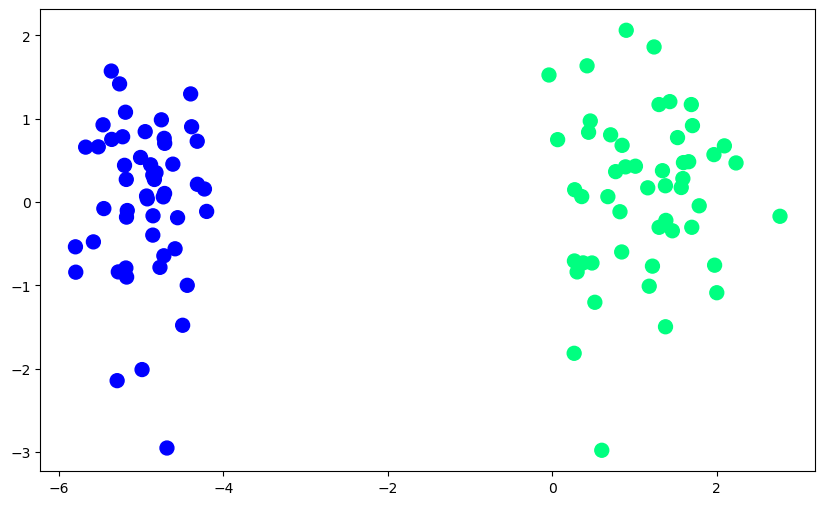

In [3]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)


##### First , we will plot the line using perceptron trick.

In [4]:
def perceptron(X,y):
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
    return weights[0],weights[1:]
        

In [5]:
def step(z):
    return 1 if z>0 else 0

In [6]:
intercept_,coef_=perceptron(X,y)

In [7]:
print(coef_)
print(intercept_)

[1.1204053  0.40381514]
1.2000000000000002


##### Calculating the m and b so that we can plot the line.

In [8]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [9]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

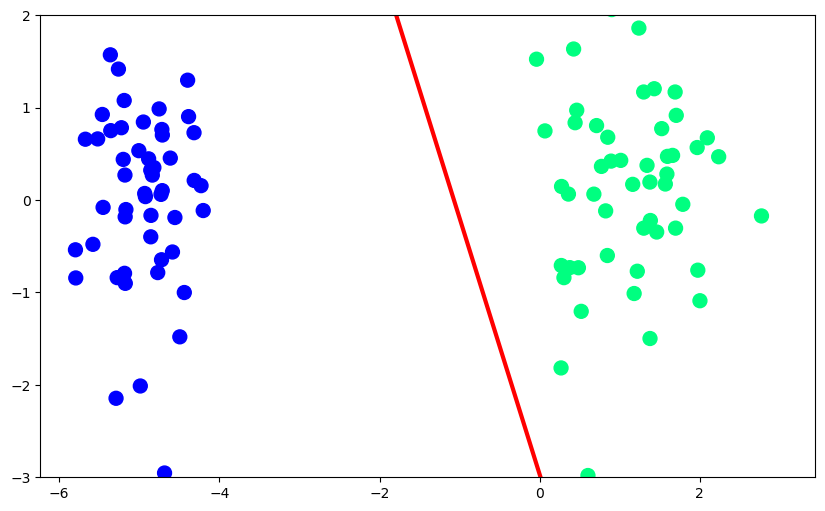

In [10]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

##### Now ,we will plot the line generated by sklearn class.

In [11]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor.fit(X,y)

LogisticRegression()

In [12]:
m = -(lor.coef_[0][0]/lor.coef_[0][1])
b = -(lor.intercept_/lor.coef_[0][1])

In [13]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input + b

(-3.0, 2.0)

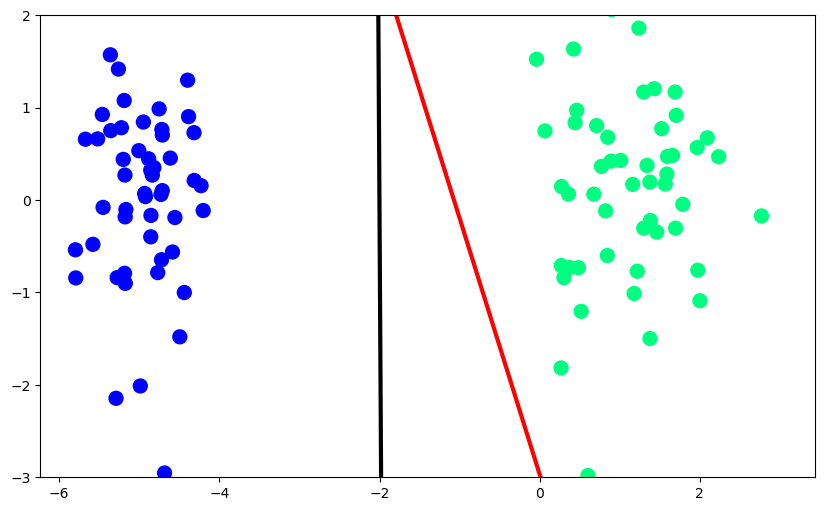

In [14]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

##### Now , we will define a new func which will use sigmoid func to predict the value of y hat rather than step func.Value of sigmoid func ranges from 0 to 1 .If the input is infinitely negative then output is zero ..and if input is infinitely positive then output is 1.

##### With the help of sigmoid func , we can make the points which are correctly classified to push the line from them towards opposite direction .Hence we can get more accurate line than the line obtained through perceptron trick.

In [15]:
def perceptron(X,y):
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = sigmoid(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
    return weights[0],weights[1:]

In [16]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [17]:
intercept_,coef_ = perceptron(X,y)

In [18]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [19]:
x_input2 = np.linspace(-3,3,100)
y_input2 = m*x_input + b

##### Now , we will plot all the lines calculated above.

(-3.0, 2.0)

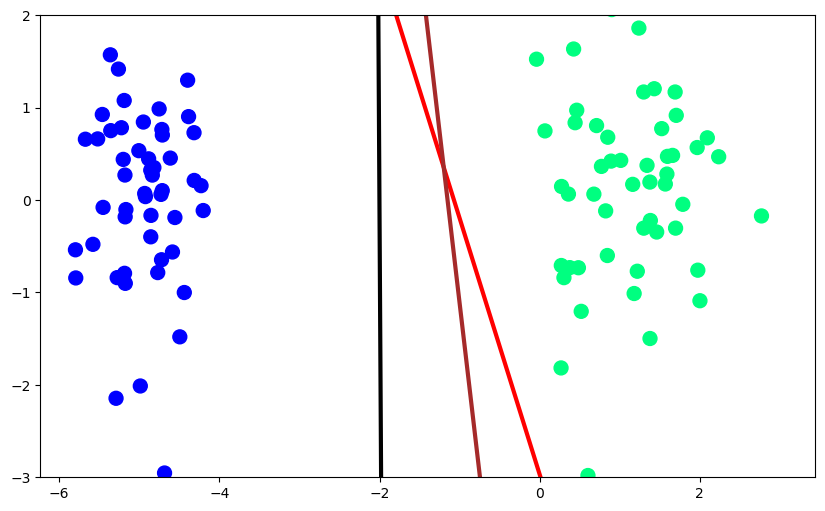

In [20]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.plot(x_input2,y_input2,color='brown',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

##### As we can see that , we have made a slight improvement than step func line,but still the line drawn by sklearn class is better.We will learn how to plot the line similar to sklearn class,later.

##### Creating animation.

In [21]:
def perceptron(X,y):
    
    m = []
    b = []
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(200):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
        m.append(-(weights[1]/weights[2]))
        b.append(-(weights[0]/weights[2]))
        
    return m,b

In [22]:
m,b = perceptron(X,y)

In [32]:
%matplotlib inline
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
from IPython.display import display, Image

MovieWriter imagemagick unavailable; using Pillow instead.


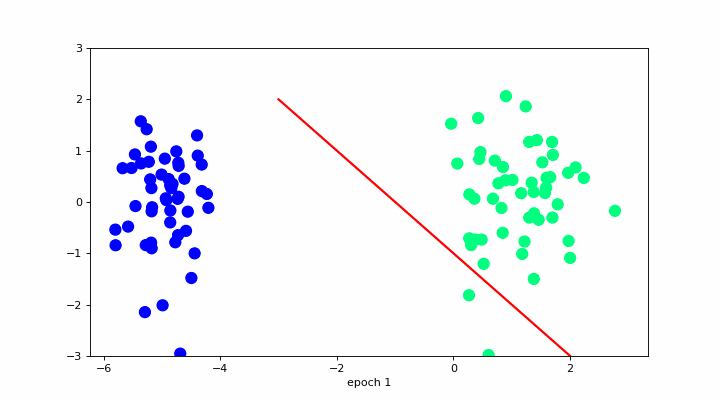

In [33]:
fig, ax = plt.subplots(figsize=(9,5))

x_i = np.arange(-3, 3, 0.1)
y_i = x_i*m[0] +b[0]
ax.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
line, = ax.plot(x_i, x_i*m[0] +b[0] , 'r-', linewidth=2)
plt.ylim(-3,3)
def update(i):
    label = 'epoch {0}'.format(i + 1)
    line.set_ydata(x_i*m[i] + b[i])
    ax.set_xlabel(label)
    # return line, ax

anim = FuncAnimation(fig, update, repeat=True, frames=200, interval=100)
anim.save('animation.gif', dpi=80, writer='imagemagick',fps=10)
plt.close()


display(Image(filename='animation.gif'))

##### The line drawn using sigmoid func tends to improve its performance even after it had classified the points.